# Introduction to Python  

### Introduction to Scraping

In [2]:
#import pylab
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import urllib
from bs4 import BeautifulSoup as bs

from IPython.display import HTML

%matplotlib inline
#%matplotlib notebook

## 1 - Using only Pandas

### 1.1 - Scraping HTML tables with Pandas

#### Checking the page: [List of cities and towns in Austria](https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Austria)

In [3]:
url1 = "https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Austria"
list_df_tables = pd.read_html(url1)
len(list_df_tables)

18

In [4]:
list_df_tables[0].head()

,Name,State,Population (as of 2022)[1]
0,Vienna,Vienna,1931593
1,Graz,Styria,292630
2,Linz,Upper Austria,207247
3,Salzburg,Salzburg,155331
4,Innsbruck,Tyrol,130585


In [5]:
list_df_tables[1].head(10)

,Name,Designation,Population
0,Andau,Market town,2285
1,Antau,Other municipality,758
2,Apetlon,Market town,1760
3,Bad Sauerbrunn,Other municipality,2219
4,Bad Tatzmannsdorf,Other municipality,1554
5,Badersdorf,Other municipality,287
6,Baumgarten,Other municipality,894
7,Bernstein,Market town,2123
8,Bildein,Other municipality,343
9,Bocksdorf,Other municipality,813


In [6]:
list_df_tables[2].head()

,Name,Designation,Population
0,Afritz am See,Other municipality,1429
1,Albeck,Other municipality,995
2,Althofen,Other city,4759
3,Arnoldstein,Market town,7096
4,Arriach,Other municipality,1349


### 1.2 - Read files from URLs with Pandas

Source: [data.gv.at](https://www.data.gv.at/katalog/dataset/41f8db46-d2d9-48b3-a8b3-138742613c1a)

In [7]:
df = pd.read_csv("https://www.wien.gv.at/menschen/integration/ogd/interkultureller-kalender-2023.csv", 
                 skiprows=5, 
                 usecols=[0,1,2,3],
                 engine="python",
                 on_bad_lines="skip",
                 sep=";",
                )
df.head(10)

,Datum,Kategorie,Titel,Beschreibung
0,01.Jän.23,International,Neujahr (staatlicher Feiertag),Beginn des Jahres nach dem gregorianischen Kal...
1,06.Jän.23,Christentum,"Heilige Drei Könige (katholisch, evangelisch, ...","Beim Dreikönigsfest (auch Epiphanie, das heißt..."
2,06.Jän.23,Christentum,Orthodoxer Heiliger Abend (nach julianischem K...,"Als Symbol für den Stall, den Ort der Geburt J..."
3,07.Jän.23,Christentum,Orthodoxes Weihnachten/Orthodoxer Christtag (n...,Serbische Bräuche: Am frühen Morgen besucht ei...
4,22.Jän.23,Traditionell,Chinesisches Neujahr,Nach dem chinesischen Kalender beginnt das Jah...
5,02.Feb.23,Christentum,Mariä Lichtmess / Darstellung des Herrn (katho...,"Auch ""Einführung Jesu in den Tempel"" genannt. ..."
6,06.Feb.23,Judentum,Tu BiSchwat,"In Hebräisch so viel wie: ""15. Tag im Monat Sc..."
7,14.Feb.23,International,Valentinstag,An diesem Tag werden Blumen als Zeichen der Zu...
8,16.Feb.23,Islam,Hizir Fest,14. bis 16. Februar: Hizir Fasten / Festtag (a...
9,22.Feb.23,Christentum,"Aschermittwoch (katholisch, evangelisch)",Für die katholischen Christinnen und Christen ...


***

## 2 - Scraping static pages using only [Requests](https://docs.python-requests.org/en/master/)

#### Which one to use: [urllib or requests?](https://stackoverflow.com/questions/2018026/what-are-the-differences-between-the-urllib-urllib2-urllib3-and-requests-modul)

### 2.1 - Getting html content of the page  

Source: [https://www.data.gv.at/](https://www.data.gv.at/suche/?typeFilter%5B%5D=dataset)

In [8]:
url2 = 'https://www.data.gv.at/suche/?typeFilter%5B%5D=dataset' 
content = requests.get(url2)
print(content.status_code)

200


Check [HTTP status codes](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status) 

In [9]:
content.text[0:5000]

'\n<!doctype html>\n<html lang="en">\n<head>\n\t<meta charset="utf-8">\n\n<!-- Diese Seite wurde optimiert mit wpSEO (https://www.wpseo.org). -->\n<title>Suche | data.gv.at</title>\n<meta name="robots" content="index, follow" />\n<link rel="canonical" href="https://www.data.gv.at/suche/" />\n<meta property="og:type" content="article">\n<meta property="og:url" content="https://www.data.gv.at/suche/">\n<meta property="og:title" content="Suche | data.gv.at">\n<meta property="og:description" content="">\n<meta property="og:image" content="https://www.data.gv.at/logo-200x200.png">\n<meta name="twitter:card" content="summary">\n<meta name="twitter:site" content="datagvat">\n<meta name="twitter:title" content="Suche | data.gv.at">\n<meta name="twitter:description" content="">\n\n\n\t<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\t<meta http-equiv="description" content="Offene

### How to filter content from the HTML?  

#### A brief introduction to [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library:

[Free Course](https://www.classcentral.com/course/freecodecamp-web-scraping-with-python-beautiful-soup-crash-course-57810)

In [11]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/XVv6mJpFOb0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/home/renato/Documents/env_default/lib/python3.10/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### Beautiful Soup parsers:

In [12]:
df_parsers = pd.read_html("https://www.crummy.com/software/BeautifulSoup/bs4/doc/")[0]
df_parsers.columns = df_parsers.iloc[0]
df_parsers.drop(df_parsers.index[0], inplace=True)
df_parsers.head()

,Parser,Typical usage,Advantages,Disadvantages
1,Python’s html.parser,"BeautifulSoup(markup, ""html.parser"")",Batteries included Decent speed Lenient (As of...,"Not as fast as lxml, less lenient than html5lib."
2,lxml’s HTML parser,"BeautifulSoup(markup, ""lxml"")",Very fast Lenient,External C dependency
3,lxml’s XML parser,"BeautifulSoup(markup, ""lxml-xml"") BeautifulSou...",Very fast The only currently supported XML parser,External C dependency
4,html5lib,"BeautifulSoup(markup, ""html5lib"")",Extremely lenient Parses pages the same way a ...,Very slow External Python dependency


#### Back to our page content...

In [13]:
soup = bs(content.text,'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


### 2.1.1 - Getting formatted html content of the page 

In [14]:
print(soup.prettify()[0:10000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <!-- Diese Seite wurde optimiert mit wpSEO (https://www.wpseo.org). -->
  <title>
   Suche | data.gv.at
  </title>
  <meta content="index, follow" name="robots"/>
  <link href="https://www.data.gv.at/suche/" rel="canonical"/>
  <meta content="article" property="og:type"/>
  <meta content="https://www.data.gv.at/suche/" property="og:url"/>
  <meta content="Suche | data.gv.at" property="og:title"/>
  <meta content="" property="og:description"/>
  <meta content="https://www.data.gv.at/logo-200x200.png" property="og:image"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="datagvat" name="twitter:site"/>
  <meta content="Suche | data.gv.at" name="twitter:title"/>
  <meta content="" name="twitter:description"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Offene Daten Österrei

### 2.1.2 -  Getting only the text of the page 

In [15]:
#print(soup.get_text()[0:10000])
print(re.sub(r"\n{2,}"," ", soup.get_text()[0:5000]))

 Suche | data.gv.at /* <![CDATA[ */
var wpml_cookies = {"wp-wpml_current_language":{"value":"de","expires":1,"path":"\/"}};
var wpml_cookies = {"wp-wpml_current_language":{"value":"de","expires":1,"path":"\/"}};
/* ]]> */ moment.updateLocale( 'de_DE', {"months":["Januar","Februar","M\u00e4rz","April","Mai","Juni","Juli","August","September","Oktober","November","Dezember"],"monthsShort":["Jan","Feb","Mrz","Apr","Mai","Jun","Jul","Aug","Sep","Okt","Nov","Dez"],"weekdays":["Sonntag","Montag","Dienstag","Mittwoch","Donnerstag","Freitag","Samstag"],"weekdaysShort":["So","Mo","Di","Mi","Do","Fr","Sa"],"week":{"dow":1},"longDateFormat":{"LT":"H:i","LTS":null,"L":null,"LL":"j. F Y","LLL":"j. F Y G:i","LLLL":null}} ); Seitenbereiche Inhalt (Accesskey 0)
Hauptmenü (Accesskey 1)
Suche (Accesskey 2) 							41146						 							701						 							2390						 Datensätze Anwendungen Organisationen de en deen 					document.getElementById("ckan_de").onclick = function () {
						location.pathname = locatio

### 2.1.3 -  Getting page information

In [16]:
# title of the page
print(soup.title)

# get attributes:
print(soup.title.name)

# get values:
print(soup.title.string)

# beginning navigation:
print(soup.title.parent.name)

# getting specific values:
print(soup.p)

<title>Suche | data.gv.at</title>
title
Suche | data.gv.at
head
<p class="hidden">Seitenbereiche</p>


#### 2.1.3.1 - Finding paragraph tags `p` is a fairly common task.  
In the case above, we're just finding the first one. What if we wanted to find them all?

In [17]:
print(soup.find_all('p'))

[<p class="hidden">Seitenbereiche</p>, <p><img alt="" src="/stats/matomo.php?idsite=1" style="border:0"/></p>]


In [18]:
for paragraph in soup.find_all('p'):
    print(paragraph.string)

Seitenbereiche
None


In [19]:
for paragraph in soup.find_all('p'):
    print(str(paragraph.text))

Seitenbereiche



The difference between string and text is that string produces a NavigableString object, and text is just typical unicode text. Notice that, if there are child tags in the paragraph item that we're attempting to use .string on, we will get None returned.

#### 2.1.3.2 - Extracting anchors and links

In [20]:
soup.find_all('a')[0:20]

[<a accesskey="0" class="skip" href="#jump_inhalt">Inhalt (<span lang="en" xml:lang="en">Accesskey</span> 0)</a>,
 <a accesskey="1" class="skip" href="#jump_menu">Hauptmenü (<span lang="en" xml:lang="en">Accesskey</span> 1)</a>,
 <a accesskey="2" class="skip" href="#jump_suche">Suche (<span lang="en" xml:lang="en">Accesskey</span> 2)</a>,
 <a href="/"><img alt="Logo data.gv.at" class="logo" src="https://www.data.gv.at/wp-content/themes/datagvat-child/img/logo.svg"/></a>,
 <a class="wpml-ls-link" href="https://www.data.gv.at/suche/?typeFilter%5B0%5D=dataset">
 <span class="wpml-ls-native">de</span></a>,
 <a class="wpml-ls-link" href="https://www.data.gv.at/en/search/?typeFilter%5B0%5D=dataset">
 <span class="wpml-ls-display">en</span></a>,
 <a href="#" id="ckan_de"><span class="lang-select">de</span></a>,
 <a href="#" id="ckan_en"><span class="lang-select">en</span></a>,
 <a href="https://mastodon.social/@datagvat" rel="me" target="_blank" title="data.gv.at auf Mastodon">
 <img alt="Mas

#### 2.1.3.3 - Extracting only the *href* of anchors and links

In [21]:
for link in soup.find_all('a')[0:30]:
    print(link.get('href'))
    #print(link.text)

#jump_inhalt
#jump_menu
#jump_suche
/
https://www.data.gv.at/suche/?typeFilter%5B0%5D=dataset
https://www.data.gv.at/en/search/?typeFilter%5B0%5D=dataset
#
#
https://mastodon.social/@datagvat
https://twitter.com/datagvat
https://www.facebook.com/groups/opendataaustria
https://www.instagram.com/data.gv.at/
/infos/rss-feeds/
/2022/09/29/10-jahre-data-gv-at-van-der-bellen/
None
#
https://www.data.gv.at/daten/
https://www.data.gv.at/daten/
/katalog/dataset/metadaten-von-ogd-osterreich
#
https://www.data.gv.at/daten/covid-19/
https://www.data.gv.at/daten/ausschreibungen-laut-bvergg2018/
https://www.data.gv.at/daten/inspire/
#
https://www.data.gv.at/daten/ckan-apps/
https://www.data.gv.at/daten/veroeffentlichende-stellen/
https://www.data.gv.at/2021/06/09/neue-interaktive-visualisierung-verfuegbar-die-daten-von-data-gv-at/
#
https://www.data.gv.at/daten/anleitung-zur-datenveroeffentlichung/
https://www.data.gv.at/daten/daten-hinzufuegen/


#### Now, rather than working with the entire soup, we can specify a new Beautiful Soup object. An example might be:

In [22]:
nav = soup.nav

#### Next, we can grab the links from just the nav bar:

In [23]:
for url in nav.find_all('a')[0:30]:
    print(url.get('href'))

#
https://www.data.gv.at/daten/
https://www.data.gv.at/daten/
/katalog/dataset/metadaten-von-ogd-osterreich
#
https://www.data.gv.at/daten/covid-19/
https://www.data.gv.at/daten/ausschreibungen-laut-bvergg2018/
https://www.data.gv.at/daten/inspire/
#
https://www.data.gv.at/daten/ckan-apps/
https://www.data.gv.at/daten/veroeffentlichende-stellen/
https://www.data.gv.at/2021/06/09/neue-interaktive-visualisierung-verfuegbar-die-daten-von-data-gv-at/
#
https://www.data.gv.at/daten/anleitung-zur-datenveroeffentlichung/
https://www.data.gv.at/daten/daten-hinzufuegen/
https://www.data.gv.at/applikationen/
https://www.data.gv.at/applikationen/
https://www.data.gv.at/applikationen/anwendung-einreichen/
https://www.data.gv.at/infos/
https://www.data.gv.at/infos/zielsetzung-data-gv-at/
https://www.data.gv.at/infos/open-data-prinzipien/
https://www.data.gv.at/infos/entwicklung-von-open-data/
https://www.data.gv.at/infos/e-learning-module-zu-open-data/
https://www.data.gv.at/infos/videos/
#
https:/

In this case, we're grabbing the first nav tags that we can find (the navigation bar). You could also go for soup.body to get the body section, then grab the .text from there:

In [24]:
body = soup.body
for paragraph in body.find_all('p'):
    print(paragraph.text)

Seitenbereiche



Finally, sometimes there might be multiple tags with the same names, but different classes, and you might want to grab information from a specific tag with a specific class. For example, our page that we're working with has a div tag with the class of "body". We can work with this data like so:

In [26]:
for div in soup.find_all('div', class_='header--social'):
    print(div)

<div class="header--social">
<a href="https://mastodon.social/@datagvat" rel="me" target="_blank" title="data.gv.at auf Mastodon">
<img alt="Mastodon Logo" src="https://www.data.gv.at/wp-content/themes/datagvat-child/img/mastodon-logo.png"/>
</a>
<a href="https://twitter.com/datagvat" target="_blank" title="data.gv.at auf Twitter">
<img alt="Twitter Logo" src="https://www.data.gv.at/wp-content/themes/datagvat-child/img/twitter-square-brands.svg"/>
</a>
<a href="https://www.facebook.com/groups/opendataaustria" target="_blank" title="data.gv.at auf Facebook">
<img alt="Facebook Logo" src="https://www.data.gv.at/wp-content/themes/datagvat-child/img/facebook-square-brands.svg"/>
</a>
<a href="https://www.instagram.com/data.gv.at/" target="_blank" title="data.gv.at auf Instagram">
<img alt="Instagram Logo" src="https://www.data.gv.at/wp-content/themes/datagvat-child/img/instagram-square-brands.svg"/>
</a>
<a href="/infos/rss-feeds/" title="data.gv.at RSS-Feed">
<img alt="RSS Logo" src="http

In [27]:
for div in soup.find_all('div', class_='header--menu'):
    print(div)

<div class="header--menu">
<div class="header--news">
<a href="/2022/09/29/10-jahre-data-gv-at-van-der-bellen/">Grußbotschaft des Bundespräsidenten zum 10-jährigen data.gv.at Jubiläum</a>
</div>
<a class="skip" id="jump_menu" name="jump_menu"><span class="hidden">Hauptmenü</span></a>
<input class="navbar-toggle" id="navbar-toggle" type="checkbox"/>
<label class="navbar-toggle-label" for="navbar-toggle"><span></span></label>
<nav class="container">
<input id="hamburger" type="checkbox"/>
<ul class="" id="menu-hauptmenu"><li class="menu-item menu-item-type-custom menu-item-object-custom menu-item-8663" id="menu-item-8663"><a href="#"><label for="hamburger"><i class="fa fa-bars"></i></label></a></li>
<li class="menu-item menu-item-type-post_type menu-item-object-page menu-item-has-children menu-item-8666" id="menu-item-8666"><a href="https://www.data.gv.at/daten/"><label for="data">Daten</label></a>
<ul class="sub-menu">
<li class="menu-item menu-item-type-post_type menu-item-object-page 

#### 2.1.3.4 - Extracting only *http* and *https* from *href* links

In [28]:
for link in soup.findAll('a', attrs={'href': re.compile("^http[s]?://")})[0:30]:
    print(link.get('href'))

https://www.data.gv.at/suche/?typeFilter%5B0%5D=dataset
https://www.data.gv.at/en/search/?typeFilter%5B0%5D=dataset
https://mastodon.social/@datagvat
https://twitter.com/datagvat
https://www.facebook.com/groups/opendataaustria
https://www.instagram.com/data.gv.at/
https://www.data.gv.at/daten/
https://www.data.gv.at/daten/
https://www.data.gv.at/daten/covid-19/
https://www.data.gv.at/daten/ausschreibungen-laut-bvergg2018/
https://www.data.gv.at/daten/inspire/
https://www.data.gv.at/daten/ckan-apps/
https://www.data.gv.at/daten/veroeffentlichende-stellen/
https://www.data.gv.at/2021/06/09/neue-interaktive-visualisierung-verfuegbar-die-daten-von-data-gv-at/
https://www.data.gv.at/daten/anleitung-zur-datenveroeffentlichung/
https://www.data.gv.at/daten/daten-hinzufuegen/
https://www.data.gv.at/applikationen/
https://www.data.gv.at/applikationen/
https://www.data.gv.at/applikationen/anwendung-einreichen/
https://www.data.gv.at/infos/
https://www.data.gv.at/infos/zielsetzung-data-gv-at/
htt

### 2.1.4 - Creating a small generic function to extract links:

In [29]:
def getLinks(url):
    raw_page = requests.get(url)
    html_page = raw_page.text
    #html_page = urllib.request.urlopen(url)
    soup = bs(html_page)
    links = []
    for link in soup.findAll('a', attrs={'href': re.compile("^http[s]?://")}):
        links.append(link.get('href'))
    return links

In [30]:
print(getLinks("https://www.krone.at/"))

['https://www.krone.at/', 'https://apps.apple.com/us/app/krone/id633492143?itsct=apps_box_badge&itscg=30200', 'https://play.google.com/store/apps/details?id=at.krone&pcampaignid=pcampaignidMKT-Other-global-all-co-prtnr-py-PartBadge-Mar2515-1', 'https://vorteilswelt.krone.at/', 'https://service.krone.at/?23028&utm_source=krone.at&utm_medium=www&utm_campaign=StartseitenVerlinkung&utm_content=service', 'https://www.krone.at/epaper_weiche', 'https://www.krone.at/community', 'https://www.krone.at/gewinnspiele', 'https://www.krone.at', 'https://www.krone.at/kroneplus', 'https://www.krone.at/oesterreich', 'https://www.krone.at/bundeslaender', 'https://www.krone.at/politik', 'https://www.krone.at/ausland', 'https://www.krone.at/sport', 'https://www.krone.at/wm', 'https://www.krone.at/adabei', 'https://www.krone.at/digital', 'https://www.krone.at/weihnachts-extra', 'https://www.krone.at/motor', 'https://www.krone.at/wirtschaft', 'https://www.krone.at/wissenschaft', 'https://www.krone.at/gericht

#### 2.1.5 - Extracting information from tables

In [31]:
url3 = urllib.request.urlopen('https://pythonprogramming.net/parsememcparseface/').read()
soup = bs(url3,'lxml')

In [32]:
table = soup.table
#table = soup.find('table')

In [33]:
table_rows = table.find_all('tr')

In [34]:
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    print(row)

[]
['Python', '932914021', 'Definitely']
['Pascal', '532', 'Unlikely']
['Lisp', '1522', 'Uncertain']
['D#', '12', 'Possibly']
['Cobol', '3', 'No.']
['Fortran', '52124', 'Yes.']
['Haskell', '24', 'lol.']


***

### 3 - Parsing dynamically updated data via javascript

[General Info](https://stackoverflow.com/questions/8049520/web-scraping-javascript-page-with-python)  
[Selenium](https://www.selenium.dev/)   
[Dry Scape](https://dryscrape.readthedocs.io/en/latest/)  

In [35]:
url4 = "https://kurier.at/"
content = requests.get(url4)
print(content.status_code)

200


***

### 4 - Using Requests with Parameters

[Example](https://towardsdatascience.com/web-scraping-101-in-python-35f8653b1c97) of using [parameters with *requests*](https://docs.python-requests.org/en/master/user/quickstart/) on [IMDB](https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating):

After taking a look at the IMDB webpage, we’ll set out to extract (all highlighted in the above screenshot of the page):

+ Movie title
+ Release year
+ Runtime
+ Audience rating
+ Genre
+ IMDB rating
+ Number of votes
+ Box office earnings
+ Director
+ Primary actors

In [113]:
url3 = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'

def get_page_contents(url):
    page = requests.get(url, headers={"Accept-Language": "en-US"})
    return bs(page.text, "html.parser")

soup = get_page_contents(url3)

Extracting text: Movie titles and release year

Since we’ve already located the HTML tag containing each movie card, we can get a list of all distinct movies and their corresponding HTML by:

In [114]:
movies = soup.findAll('h3', class_='lister-item-header') 
movies[0:5]

[<h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0111161/">The Shawshank Redemption</a>
 <span class="lister-item-year text-muted unbold">(1994)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">2.</span>
 <a href="/title/tt0068646/">The Godfather</a>
 <span class="lister-item-year text-muted unbold">(1972)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">3.</span>
 <a href="/title/tt0468569/">The Dark Knight</a>
 <span class="lister-item-year text-muted unbold">(2008)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">4.</span>
 <a href="/title/tt0167260/">The Lord of the Rings: The Return of the King</a>
 <span class="lister-item-year text-muted unbold">(2003)</span>
 </h3>,
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">5.</span>

The findAll method creates a list where each entry contains the HTML that’s captured within the h3 tag and list-item-header class.  
By taking a deeper look at the first movies HTML and see that the movie title can be found under the first a tag.

To capture this attribute we can loop through all movies and either call findAll and grab the first element of the list, or we can use the find method which automatically grabs the first tag it finds. Thus, we can construct a list of all movie titles (with a little help from list comprehensions for efficiency) through:

In [18]:
titles = [movie.find('a').text for movie in movies]
titles[0:10]

['Jai Bhim',
 'The Shawshank Redemption',
 'The Godfather',
 'Soorarai Pottru',
 'The Dark Knight',
 'The Godfather: Part II',
 '12 Angry Men',
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 "Schindler's List"]

Release years can be found under the tag span and class lister-item-year text-muted unbold. To grab these, we can follow a similar approach as before:

In [19]:
release = [movie.find('span', class_='lister-item-year text-muted unbold').text for movie in movies]
release[0:10]

['(2021)',
 '(1994)',
 '(1972)',
 '(2020)',
 '(2008)',
 '(1974)',
 '(1957)',
 '(2003)',
 '(1994)',
 '(1993)']

Extracting Numerical Values:

In the case of IMDB ratings, number of votes and box office earnings we can see that while these may be available as string values, can also grab the actual numerical values from the data-value attribute within each respective tag.

Here’s the IMDB rating of The Godfather:  
\<div class="inline-block ratings-imdb-rating" name="ir" data-value="9.2">

In [20]:
soup.find('div', class_='inline-block ratings-imdb-rating')['data-value']

'9.3'

In the case of number of votes and earnings we don’t have a class attribute to filter for. Here are the number of votes and estimated box office earnings:

In [21]:
votes_earnings = soup.findAll('span', {'name':'nv'})
print([ve['data-value'] for ve in votes_earnings])

['166955', '2524608', '28,341,469', '1738105', '134,966,411', '105969', '2474861', '534,858,444', '1206022', '57,300,000', '745533', '4,360,000', '1742556', '377,845,905', '1945178', '107,928,762', '1290110', '96,898,818', '2219102', '292,576,195', '381254', '34422', '1985641', '37,030,102', '1763818', '315,544,750', '1948453', '330,252,182', '729757', '6,100,000', '80169', '111744', '1574783', '342,551,365', '1819851', '171,479,930', '1092313', '46,836,394', '1226372', '290,475,067', '968073', '112,000,000', '704737', '53,367,844', '33253', '1670884', '188,020,017', '731227', '7,563,397', '711808', '10,055,859', '1318236', '216,540,909', '1228259', '136,801,374', '664080', '57,598,247', '1549651', '100,125,643', '1357805', '130,742,922', '1297940', '322,740,140', '51376', '333835', '269,061', '437425', '27144', '784073', '13,092,000', '813495', '13,182,281', '1268744', '53,089,891', '1262628', '132,384,315', '787132', '32,572,577', '1426161', '187,705,427', '1081233', '6,719,864', '10

In [22]:
votes = []
earnings = []
idx = 0
while idx < len(votes_earnings)-1:
    votes.append(votes_earnings[idx]['data-value'])
    earnings.append(votes_earnings[idx+1]['data-value'])
    idx+=2
print(votes[0:5])
print(earnings[0:5])

['166955', '28,341,469', '134,966,411', '2474861', '1206022']
['2524608', '1738105', '105969', '534,858,444', '57,300,000']


Nested Values

In the case where the data we need is located within multiple levels of generic tags, we’ll need to dig into this nested structure to extract what we need.

In the case of the movie directors and actors we’ll need to do just that. From inspecting the HTML we see that the director information is located within an initial p tag and thereafter an a tag — both without class attributes making it necessary to unnest the data. We’ll do this by calling find and findAll repeatedly.

Since the director is the 1st a tag, we can extract this information through:

In [23]:
for l1 in soup.findAll('p')[0:10]:
    if l1.find('a'):
        print('---')
        for l2 in l1.findAll('a'):
            print(l2)
            print(l2.text)

---
<a href="/chart/top/?ref_=ats_top1000serp_to_top250chart">IMDb Top 250 Movies chart</a>
IMDb Top 250 Movies chart
---
<a href="/name/nm4377096/">T.J. Gnanavel</a>
T.J. Gnanavel
<a href="/name/nm1421814/">Suriya</a>
Suriya
<a href="/name/nm7934649/">Lijo Mol Jose</a>
Lijo Mol Jose
<a href="/name/nm8904193/">Manikandan</a>
Manikandan
<a href="/name/nm8135195/">Rajisha Vijayan</a>
Rajisha Vijayan
---
<a href="/name/nm0001104/">Frank Darabont</a>
Frank Darabont
<a href="/name/nm0000209/">Tim Robbins</a>
Tim Robbins
<a href="/name/nm0000151/">Morgan Freeman</a>
Morgan Freeman
<a href="/name/nm0348409/">Bob Gunton</a>
Bob Gunton
<a href="/name/nm0006669/">William Sadler</a>
William Sadler


In [24]:
actors = [actor.text for actor in soup.findAll('p')[2].findAll('a')]
actors

[]

#### Creating functions to automate information scraping on IMDB:

In [25]:
def numeric_value(movie, tag, class_=None, order=None):
    if order:
        if len(movie.findAll(tag, class_)) > 1:
            to_extract = movie.findAll(tag, class_)[order]['data-value']
        else:
            to_extract = None
    else:
        to_extract = movie.find(tag, class_)['data-value']

    return to_extract


def text_value(movie, tag, class_=None):
    if movie.find(tag, class_):
        return movie.find(tag, class_).text
    else:
        return


def nested_text_value(movie, tag_1, class_1, tag_2, class_2, order=None):
    if not order:
        return movie.find(tag_1, class_1).find(tag_2, class_2).text
    else:
        return [val.text for val in movie.find(tag_1, class_1).findAll(tag_2, class_2)[order]]


def extract_attribute(soup, tag_1, class_1='', tag_2='', class_2='',
                      text_attribute=True, order=None, nested=False):
    movies = soup.findAll('div', class_='lister-item-content')
    data_list = []
    for movie in movies:
        if text_attribute:
            if nested:
                data_list.append(nested_text_value(movie, tag_1, class_1, tag_2, class_2, order))
            else:
                data_list.append(text_value(movie, tag_1, class_1))
        else:
            data_list.append(numeric_value(movie, tag_1, class_1, order))

    return data_list

#### Creating a Dataframe with the information

In [26]:
titles = extract_attribute(soup, 'a')
release = extract_attribute(soup, 'span', 'lister-item-year text-muted unbold')
audience_rating = extract_attribute(soup, 'span', 'certificate')
runtime = extract_attribute(soup, 'span', 'runtime')
genre = extract_attribute(soup, 'span', 'genre')
imdb_rating = extract_attribute(soup, 'div', 'inline-block ratings-imdb-rating', False)
votes = extract_attribute(soup, 'span' , {'name' : 'nv'}, False, 0)
earnings = extract_attribute(soup, 'span' , {'name' : 'nv'}, False, 1)
directors = extract_attribute(soup, 'p', '', 'a', '', True, 0, True)
actors = extract_attribute(soup, 'p', '', 'a', '', True, slice(1, 5, None), True)


df_dict = {'Title': titles, 'Release': release, 'Audience Rating': audience_rating,
           'Runtime': runtime, 'Genre': genre, 'IMDB Rating': imdb_rating,
           'Votes': votes, 'Box Office Earnings': earnings, 'Director': directors,
           'Actors': actors}

df = pd.DataFrame(df_dict)
df.head()

,Title,Release,Audience Rating,Runtime,Genre,IMDB Rating,Votes,Box Office Earnings,Director,Actors
0,Jai Bhim,(2021),TV-MA,164 min,"\nCrime, Drama",\n\n9.3\n,"166,955","166,955",T.J. Gnanavel,"[Suriya, Lijo Mol Jose, Manikandan, Rajisha Vi..."
1,The Shawshank Redemption,(1994),R,142 min,\nDrama,\n\n9.3\n,"2,524,608","2,524,608",Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
2,The Godfather,(1972),R,175 min,"\nCrime, Drama",\n\n9.2\n,"1,738,105","1,738,105",Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
3,Soorarai Pottru,(2020),TV-MA,153 min,\nDrama,\n\n9.1\n,"105,969","105,969",Sudha Kongara,"[Suriya, Paresh Rawal, Urvashi, Aparna Balamur..."
4,The Dark Knight,(2008),PG-13,152 min,"\nAction, Crime, Drama",\n\n9.0\n,"2,474,861","2,474,861",Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."


### Manually creating a Dataframe and starting analysis

In [27]:
url4 = "http://www.hubertiming.com/results/2017GPTR10K"
html = urllib.request.urlopen(url4)
soup = bs(html, 'lxml')

In [28]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [29]:
# Print out the text
text = soup.get_text()
text[0:200]

'\n\n\n\n\n\n\nRace results for the 2017 Intel Great Place to Run \\ Urban Clash Games!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n 2017 Intel Great Place to Run 10K \\ Urban Clash Games\n Hillsboro Stadium, Hillsboro, OR \n June 2nd,'

In [30]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [31]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [32]:
# Print the first 8 rows for sanity check
rows = soup.find_all('tr')
print(rows[:8])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>Chip Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

                </td>
<td>M</td>
<td>PORTLAND

In [33]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [34]:
str_cells = str(row_td)
cleantext = bs(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, 1:41:18, 1:42:10, ]


#### Now processing the whole page

In [35]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, 1:41:18, 1:42:10, ]


str

In [36]:
df = pd.DataFrame(list_rows, columns=['raw'])
df.head(10)

,raw
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


### Cleaning the fields

In [37]:
df1 = df['raw'].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None
4,[],None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [38]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None
4,],None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [39]:
col_labels = soup.find_all('th')

In [40]:
all_header = []
col_str = str(col_labels)
cleantext2 = bs(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, Chip Time, Gun Time, Team]']


In [41]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, Chip Time, Gu..."


In [42]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]


In [43]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None
4,],None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]


In [44]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None


In [45]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    Chip Time  578 non-null    object
 6    Gun Time   578 non-null    object
 7    Team]      578 non-null    object
dtypes: object(8)
memory usage: 41.0+ KB


(583, 8)

In [46]:
df6 = df5.dropna(axis=0, how='any')

In [47]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [48]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [49]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [50]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    try:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    except:
        h, m = i.split(':')
        math = (int(h) * 3600 + int(m) * 60) # + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [51]:
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,,130860.0
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...,132120.0
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,,135840.0
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,,138840.0
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...,141660.0


In [52]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,97617.157972
std,92975.700498
min,60.016667
25%,68.300000
50%,152580.000000
75%,186540.000000
max,215700.000000


In [53]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x7f5b79fe5a60>], [Text(1, 0, 'Runners')])

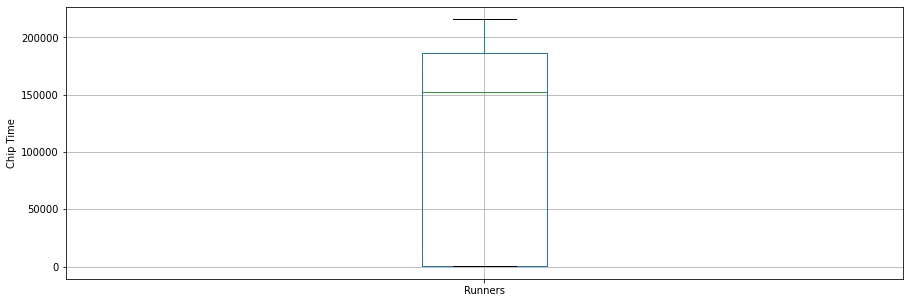

In [54]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

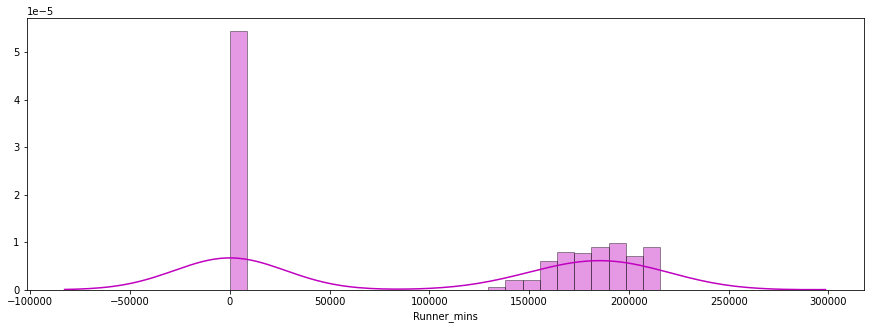

In [55]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

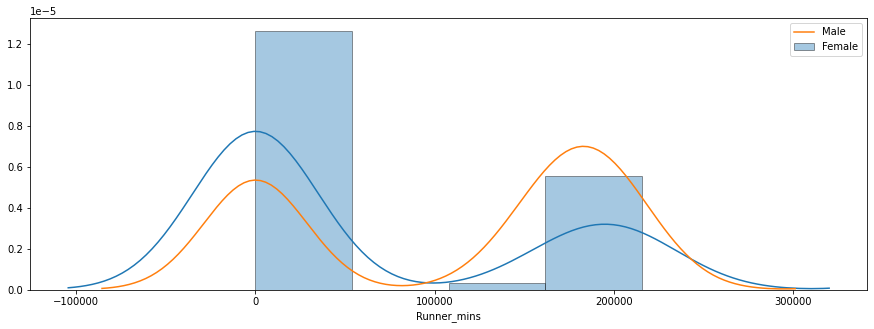

In [56]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [57]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                     \
              count           mean           std        min        25%   
 Gender                                                                  
 F            163.0   61844.168609  91100.389419  60.200000  66.550000   
 M            414.0  111701.692432  89982.758495  60.016667  69.320833   

                                            
                   50%       75%       max  
 Gender                                     
 F           75.216667  173280.0  215700.0  
 M       163320.000000  188745.0  215580.0  


Text(0.5, 0.98, '')

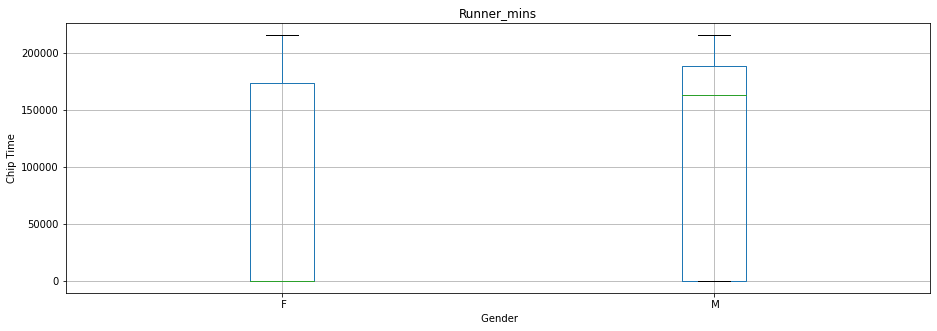

In [58]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

## Now it is your turn:

In [59]:
url5 = 'https://www.4icu.org/at/vienna/'
url6 = 'https://www.opec.org/opec_web/en/press_room/307.htm'